In [104]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%pip install pillow 
# animation saving

import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import importlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import solver as solve
import objective as obj
import helper as help
import parameters as param
from model import WormModel

from contraction import ContractionEngine_segmentdriven
import contraction as contract

importlib.reload(obj)
importlib.reload(help)
importlib.reload(param)
importlib.reload(contract)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.


<module 'contraction' from 'c:\\Users\\natha\\Desktop\\UCLA\\_Grad\\2025-2026\\FALL 2025\\MAE 263F\\MAE-263F\\FINAL_PROJECT\\contraction.py'>

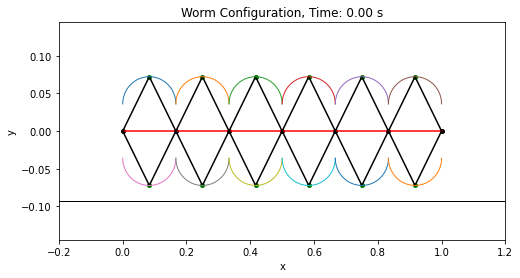

In [108]:
# 0,1, 2,3, 4,5, 6,7, 8,9 10,11 12,13, 14,15
worm6 = WormModel(name ="worm6", length=param.length, n_segments=param.n, fixedDOFs=[ 1,7,13,19,25,31,37])
worm6.plot_static()

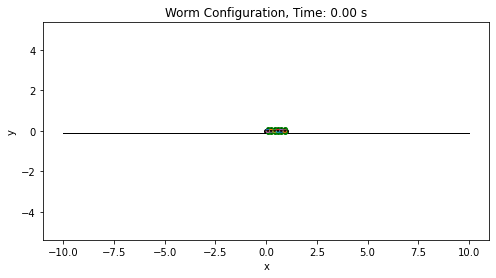

Node 5 hit ground at y=-0.0981
Contact changed - running corrector...
Node 8 hit ground at y=-0.0924
Contact changed - running corrector...
Node 5 lifting off, f_y=0.1073
Contact changed - running corrector...
Node 11 hit ground at y=-0.0922
Contact changed - running corrector...
Node 8 lifting off, f_y=0.4618
Contact changed - running corrector...
Node 14 hit ground at y=-0.0925
Contact changed - running corrector...
Node 11 lifting off, f_y=0.2840
Contact changed - running corrector...
Node 17 hit ground at y=-0.0924
Contact changed - running corrector...
Node 14 lifting off, f_y=0.1073
Contact changed - running corrector...
Node 2 hit ground at y=-0.0922
Contact changed - running corrector...
Node 17 lifting off, f_y=0.4618
Contact changed - running corrector...
Node 5 hit ground at y=-0.0925
Contact changed - running corrector...
Node 2 lifting off, f_y=0.2840
Contact changed - running corrector...


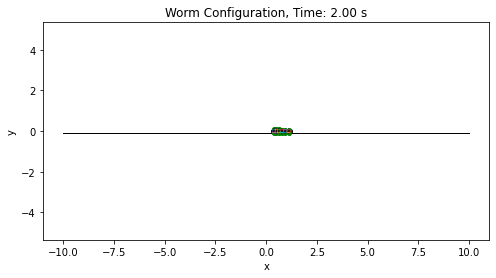

Node 8 hit ground at y=-0.0924
Contact changed - running corrector...
Node 5 lifting off, f_y=0.1073
Contact changed - running corrector...
Node 11 hit ground at y=-0.0922
Contact changed - running corrector...
Node 8 lifting off, f_y=0.4618
Contact changed - running corrector...
Node 14 hit ground at y=-0.0925
Contact changed - running corrector...
Node 11 lifting off, f_y=0.2840
Contact changed - running corrector...


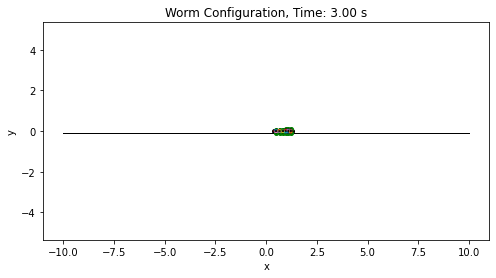

Animation: 300 total frames → 59 output frames
Playback: 2.99s sim time at 1.0x speed = 2.99s GIF
Animation saved to media/animations\worm6(36).gif


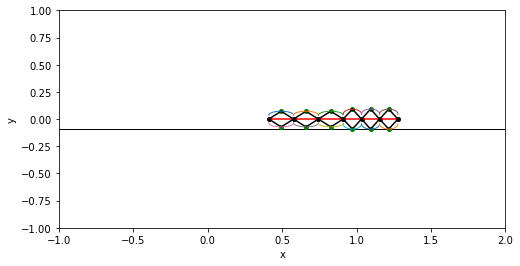

In [113]:
worm6.reset()
frames, times = solve.solver_with_predictor_corrector(worm6, dt=param.dt, maxTime=3.0, tol=1e-6, maximum_iter=param.maximum_iter, contractType='multiple_segments')
ani = worm6.animate_worm(frames, times)

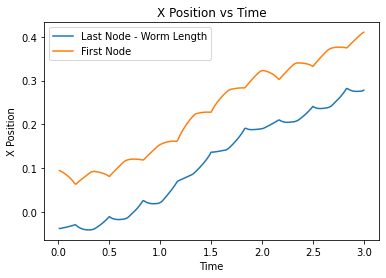

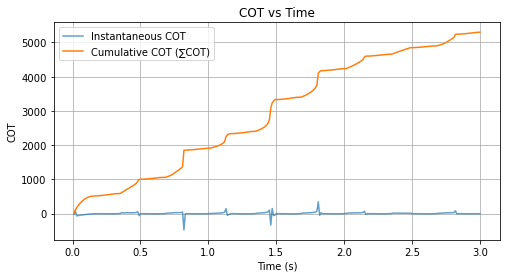

Total COT: 7.5679 J/(kg·m)
Total mass: 2.95e-09 kg
Cumulative distance: 0.234397 m
Cumulative work: 1.773881 J


In [114]:
first_node = [frame[0] for frame in frames]
first_node_xpos = [node[0] for node in first_node]

last_node = [frame[-1] for frame in frames]
last_node_xpos = [node[0] for node in last_node]
last_node_xpos = [x - param.length for x in last_node_xpos]

plt.plot(times, last_node_xpos, label='Last Node - Worm Length')
plt.plot(times, first_node_xpos, label='First Node')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.title('X Position vs Time')
plt.legend()
plt.show()

# COT over time
cot_steps = np.array(worm6.COT)
cot_time = np.array(times)

# For monotonically increasing: track cumulative work over timesteps
# Reconstruct from stored values, or modify solver to store work_history
cot_cumsum = np.cumsum(abs(cot_steps))  # Simple cumulative sum

plt.figure(figsize=(8, 4))
plt.plot(cot_time, cot_steps, label='Instantaneous COT', alpha=0.7)
plt.plot(cot_time, cot_cumsum, label='Cumulative COT (∑COT)')
plt.xlabel('Time (s)')
plt.ylabel('COT')
plt.title('COT vs Time')
plt.legend()
plt.grid(True)
plt.show()

print(f'Total COT: {worm6.total_COT:.4f} J/(kg·m)')
print(f"Total mass: {worm6.m.sum():.2e} kg")
print(f"Cumulative distance: {worm6.cumulative_distance:.6f} m")
print(f"Cumulative work: {worm6.cumulative_work:.6f} J")